<a href="https://colab.research.google.com/github/o5x3i/2023-AI/blob/main/%EC%8B%A4%EC%8A%B503_%EB%8B%A4%ED%95%AD_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#집값 데이터 읽기

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/gdrive/house_price_us.txt', names=['size', 'n_room', 'price'])
print(data)

X = np.c_[data['size'], data['n_room']]
Y = data['price']
m = len(data)

    size  n_room   price
0   2104       3  399900
1   1600       3  329900
2   2400       3  369000
3   1416       2  232000
4   3000       4  539900
5   1985       4  299900
6   1534       3  314900
7   1427       3  198999
8   1380       3  212000
9   1494       3  242500
10  1940       4  239999
11  2000       3  347000
12  1890       3  329999
13  4478       5  699900
14  1268       3  259900
15  2300       4  449900
16  1320       2  299900
17  1236       3  199900
18  2609       4  499998
19  3031       4  599000
20  1767       3  252900
21  1888       2  255000
22  1604       3  242900
23  1962       4  259900
24  3890       3  573900
25  1100       3  249900
26  1458       3  464500
27  2526       3  469000
28  2200       3  475000
29  2637       3  299900
30  1839       2  349900
31  1000       1  169900
32  2040       4  314900
33  3137       3  579900
34  1811       4  285900
35  1437       3  249900
36  1239       3  229900
37  2132       4  345000
38  4215       4  549000


In [3]:
X = (np.array(X)).reshape(m,2)
Y = (np.array(Y)).reshape(m,1)
print(X.shape, Y.shape)

(47, 2) (47, 1)


#그래프 그리기

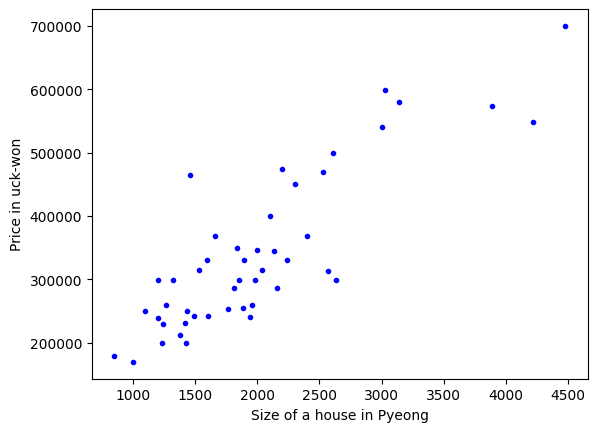

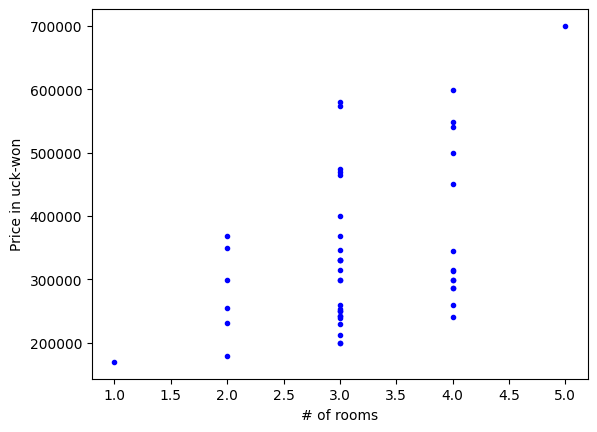

In [4]:
import matplotlib.pyplot as plt
plt.plot(X[:,0].reshape(-1), Y, 'b.')
plt.xlabel("Size of a house in Pyeong")
plt.ylabel("Price in uck-won")
plt.show()

plt.plot(X[:,1].reshape(-1), Y, 'b.')
plt.xlabel("# of rooms")
plt.ylabel("Price in uck-won")
plt.show()

#Feature scaling(normalization)

In [5]:
def featureNormalize(X):
  mu = np.mean(X, axis = 0)
  std = np.std(X, axis = 0)

  X_norm = (X - mu) / std

  return X_norm, mu, std

In [7]:
X, mu, std = featureNormalize(X)
print(X.shape)

(47, 2)


#Gradient descent -> theta

In [8]:
X_b = np.c_[np.ones((m,1)), X]

learning_rate = 0.0001
n_iter = 400

theta = np.random.randn(3,1)
gradients = np.zeros((3,1))

for i in range(n_iter):
  gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - Y)
  theta = theta - learning_rate * gradients
print("theta:")
print(theta)

theta:
[[26175.15594439]
 [ 8042.57610385]
 [ 4030.06096349]]


#임의의 집 크기(X_my)에 대한 집값 예측하기

In [9]:
X_mine = np.array([[890, 2]])
X_mine = (X_mine - mu) / std
print(X_mine)

X_mine_b = np.c_[np.ones((1,1)), X_mine]
Y_predict = X_mine_b.dot(theta)
print(Y_predict, "달러")

[[890.   2.]]
[[7192128.01029376]] 달러


#반복 횟수에 다른 비용함수 J(theta) 그리기

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def ComputeJ(t0, t1, t2, X, Y):
  m = len(X)
  X_b = np.c_[np.ones((m,1)), X]
  theta = np.array([t0, t1, t2])

  cost_vector = X_b.dot(theta) - Y
  cost_vector = cost_vector.reshape(-1)
  cost2 = np.square(cost_vector)
  cost_sum = np.sum(cost2) / (2 * m)

  return cost_sum

In [12]:
X = np.c_[data['size'], data['n_room']]
Y = data['price']
m = len(data)

X = (np.array(X)).reshape(m, 2)
Y = (np.array(Y)).reshape(m, 1)
print(X.shape, Y.shape)

X, mu, std = featureNormalize(X)
print(X.shape)

(47, 2) (47, 1)
(47, 2)


In [15]:
X_b = np.c_[np.ones((m,1)), X]

learning_rate = 0.01
n_iter = 400

theta = np.random.randn(3,1)
gradients = np.zeros((3,1))

itr_arr = []
cost_arr = []
for i in range(n_iter):
  gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - Y)
  theta = theta - learning_rate * gradients

  cost = ComputeJ(theta[0], theta[1], theta[2], X, Y)
  cost_arr.append(cost)
  itr_arr.append(i)
print("theta:")
print(theta)

theta:
[[340307.35742538]
 [107757.49181909]
 [ -4888.37087542]]


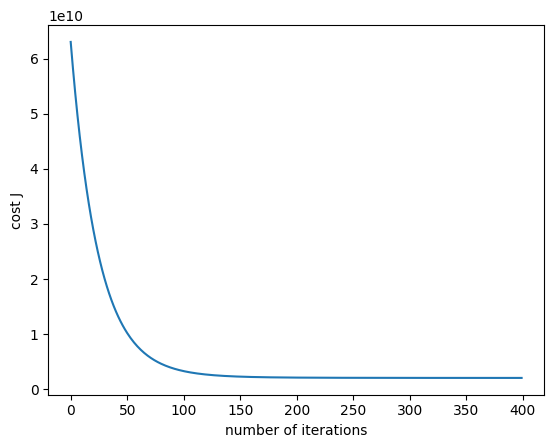

In [16]:
plt.plot(itr_arr, cost_arr)
plt.xlabel("number of iterations")
plt.ylabel("cost J")
plt.show()